## Step 1 : verifying the file directory 

In [9]:
import os

# Set working directory to your actual folder
os.chdir(r"C:\Users\aravi\Videos\project results\statistics")

# Confirm it's set
print("Current working directory:", os.getcwd())




Current working directory: C:\Users\aravi\Videos\project results\statistics


## Step 2 : Sample Directory

In [11]:
import pandas as pd

# Load Roman data
roman_df = pd.read_csv("rome alpha_diversity_results.csv")

# Load Viking/Anglo data
viking_df = pd.read_csv("vikinganglo alpha_diversity_results.csv")





## Step 3 : making sure the sample files are accessible 

In [13]:
print("Roman data preview:")
print(roman_df.head())

print("\nViking/Anglo data preview:")
print(viking_df.head())



Roman data preview:
       sample  alpha_diversity
0  ERR1329825         4.070656
1  ERR1329829         4.327820
2  ERR1329834         3.936260
3  ERR1329842         4.391893
4  ERR1329846         4.363713

Viking/Anglo data preview:
       sample  alpha_diversity
0  ERR1329827         4.315824
1  ERR1329830         4.726227
2  ERR1329832         4.103910
3  ERR1329836         3.970573
4  ERR1329838         2.750000


## Step 4: Testing for normality using Shapiro-wilk test

In [21]:
from scipy.stats import shapiro

def test_normality(data, label):
    stat, p = shapiro(data)
    print(f"{label} Shapiro-Wilk Test:")
    print(f"  W-statistic = {stat:.4f}")
    print(f"  p-value     = {p:.4f}")
    if p > 0.05:
        print(" Data appears normally distributed.\n")
    else:
        print(" Data is not normally distributed.\n")

# Running for both groups
test_normality(roman_df['alpha_diversity'], "Roman")
test_normality(viking_df['alpha_diversity'], "Viking/Anglo")



Roman Shapiro-Wilk Test:
  W-statistic = 0.7802
  p-value     = 0.0121
 Data is not normally distributed.

Viking/Anglo Shapiro-Wilk Test:
  W-statistic = 0.8639
  p-value     = 0.2030
 Data appears normally distributed.



## Step 5 : since, noramlity failed for roman sample, we will go for mann-whitney U test

In [19]:
from scipy.stats import mannwhitneyu

def compare_groups_nonparametric(group1, group2, label1, label2):
    stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
    print("Mann–Whitney U Test:")
    print(f"  U-statistic = {stat:.4f}")
    print(f"  p-value     = {p:.4f}")
    if p < 0.05:
        print(f"   Significant difference between {label1} and {label2}.\n")
    else:
        print(f"   No significant difference between {label1} and {label2}.\n")

compare_groups_nonparametric(
    roman_df['alpha_diversity'],
    viking_df['alpha_diversity'],
    "Roman",
    "Viking/Anglo"
)



Mann–Whitney U Test:
  U-statistic = 27.0000
  p-value     = 1.0000
   No significant difference between Roman and Viking/Anglo.



## Step 6: Plotting Bar plot by using alpha diversity

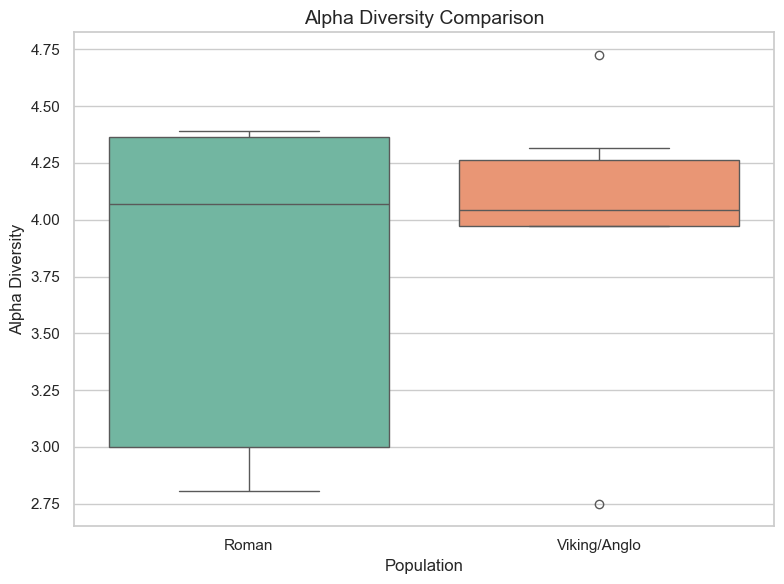

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine datasets with group labels
roman_df['group'] = 'Roman'
viking_df['group'] = 'Viking/Anglo'
combined_df = pd.concat([roman_df, viking_df], ignore_index=True)

# Set plot style
sns.set(style="whitegrid")

# Create boxplot with hue to fix warning
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    x='group',
    y='alpha_diversity',
    hue='group',
    data=combined_df,
    palette='Set2',
    dodge=False
)

# Add title and labels
plt.title("Alpha Diversity Comparison", fontsize=14)
plt.xlabel("Population", fontsize=12)
plt.ylabel("Alpha Diversity", fontsize=12)

# Show plot
plt.tight_layout()
plt.show()



## Step 7 venn diagram of all OTU between roman and Viking/anglo saxons

In [ ]:
!pip install matplotlib-venn


import os
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

def extract_otus(folder_path):
    otus = set()
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), "r") as f:
                for line in f:
                    species = line.strip().split("\t")[0]
                    otus.add(species)
    return otus

# Replace with our actual paths
roman_folder = r"C:\Users\YourSUsername\Videos\project results\samples\rome0.04"
viking_folder = r"C:\Users\YourUsername\Videos\project results\samples\vikingangalo 0.04"

roman_otus = extract_otus(roman_folder)
viking_otus = extract_otus(viking_folder)

# Plot Venn diagram
plt.figure(figsize=(8, 6))
venn2([roman_otus, viking_otus], set_labels=("Roman", "Viking/Anglo-Saxon"))
plt.title("OTU Overlap Between Roman and Viking/Anglo-Saxon Samples")
plt.show()



In [52]:
import os

def extract_otus(folder_path):
    otus = set()
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt"):
            with open(os.path.join(folder_path, filename), "r") as f:
                for line in f:
                    species = line.strip().split("\t")[0]
                    otus.add(species)
    return otus

# Correct folder paths
roman_folder = r"C:\Users\aravi\Videos\project results\samples\rome0.04"
viking_folder = r"C:\Users\aravi\Videos\project results\samples\vikingangalo 0.04"

roman_otus = extract_otus(roman_folder)
viking_otus = extract_otus(viking_folder)

# Check how many OTUs were found
print(f"Roman OTUs: {len(roman_otus)}")
print(f"Viking OTUs: {len(viking_otus)}")



Roman OTUs: 157
Viking OTUs: 113


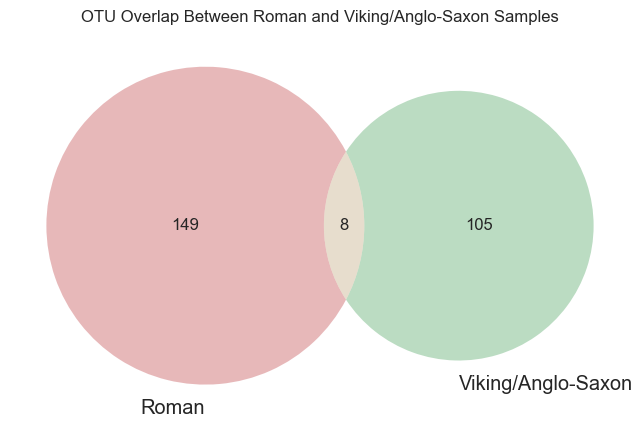

In [54]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Plot Venn diagram
plt.figure(figsize=(8, 6))
venn2([roman_otus, viking_otus], set_labels=("Roman", "Viking/Anglo-Saxon"))
plt.title("OTU Overlap Between Roman and Viking/Anglo-Saxon Samples")
plt.show()



## Step 7 : Heat map of OTU across all samples 

Top OTUs: ['Caloranaerobacter', 'Flintibacter', 'Pseudanabaena', 'Acetoanaerobium', 'Intestinibaculum', 'Filifactor', 'Moorella', 'Mobiluncus', 'Jeotgalibaca', 'Paludibacter', 'Vagococcus', 'Streptobacillus', 'Paeniclostridium', 'Acetobacterium', 'Methanosphaera', 'Peptoniphilus', 'Clostridioides', 'Listeria', 'Vulcanisaeta', 'Methanofervidicoccus', 'Acetomicrobium', 'Butyrivibrio', 'Methanothermus', 'Succinivibrio', 'Polaribacter', 'Changchengzhania', 'Megamonas', 'Solibacillus', 'Archaeoglobus', 'Basilea', 'Mogibacterium', 'Halobacteroides', 'Sporanaerobacter', 'Gottschalkia', 'Alphafusellovirus', 'Candidatus', 'Cryptobacterium']
Matrix shape: (15, 37)
            Caloranaerobacter  Flintibacter  Pseudanabaena  Acetoanaerobium  \
ERR1329825               0.00          4.76            0.0             9.52   
ERR1329829               3.12          0.00            0.0             0.00   
ERR1329834               4.55          0.00            0.0             0.00   
ERR1329842           

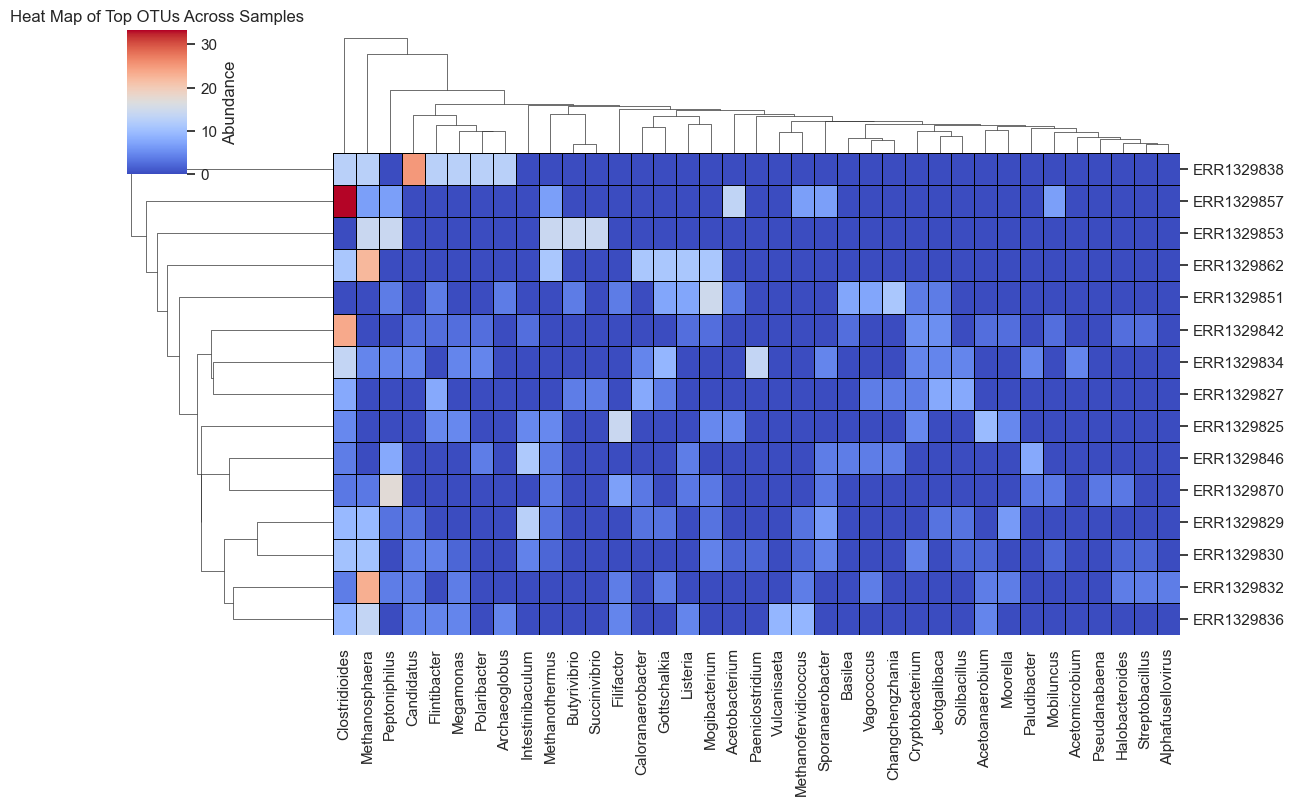

In [60]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#  Step 1: Define your folders
abundance_folders = [
    r"C:\Users\aravi\Videos\project results\samples\rome0.04",
    r"C:\Users\aravi\Videos\project results\samples\vikingangalo 0.04"
]

# Step 2: Get top OTUs from each sample
def get_top_otus(folders, top_n=5):
    otu_set = set()
    for folder in folders:
        for file in os.listdir(folder):
            if file.endswith(".txt"):
                abundances = {}
                with open(os.path.join(folder, file), "r") as f:
                    for line in f:
                        parts = line.strip().split(",")
                        if len(parts) == 3:
                            species = parts[0].strip()
                            abundance = float(parts[2].strip())
                            abundances[species] = abundance
                top_hits = sorted(abundances.items(), key=lambda x: x[1], reverse=True)[:top_n]
                for species, _ in top_hits:
                    otu_set.add(species)
    return list(otu_set)

# Step 3: Build abundance matrix
def build_matrix(folders, otu_list):
    data = []
    sample_names = []
    for folder in folders:
        for file in os.listdir(folder):
            if file.endswith(".txt"):
                sample_name = file.split("_")[0]
                sample_names.append(sample_name)
                abundances = {otu: 0 for otu in otu_list}
                with open(os.path.join(folder, file), "r") as f:
                    for line in f:
                        parts = line.strip().split(",")
                        if len(parts) == 3:
                            species = parts[0].strip()
                            abundance = float(parts[2].strip())
                            if species in abundances:
                                abundances[species] = abundance
                data.append([abundances[otu] for otu in otu_list])
    return pd.DataFrame(data, index=sample_names, columns=otu_list)

#  Step 4: Run it
top_otus = get_top_otus(abundance_folders, top_n=5)
print("Top OTUs:", top_otus)

abundance_matrix = build_matrix(abundance_folders, top_otus)
print("Matrix shape:", abundance_matrix.shape)
print(abundance_matrix.head())

# Step 5: Plot heat map
sns.clustermap(
    abundance_matrix,
    cmap="coolwarm",
    linewidths=0.5,
    linecolor="black",
    figsize=(12, 8),
    cbar_kws={"label": "Abundance"},
    col_cluster=True,
    row_cluster=True
)
plt.title("Heat Map of Top OTUs Across Samples")
plt.show()





## Step 8: finding out top 10 genus OTU's based on abundance of both roman and vikings/anglo saxons samples and also the overlapping OTU 

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Step 1: Define input folders 
# These should contain per-sample abundance files (Genus, Count, Abundance)
roman_path = r"C:\Users\aravi\Videos\project results\samples\rome0.04"
viking_path = r"C:\Users\aravi\Videos\project results\samples\vikingangalo 0.04"

#  Step 2: Create output folder for results 
output_folder = "otu_analysis"
os.makedirs(output_folder, exist_ok=True)

#  Step 3: Load and merge Roman sample files 
roman_dfs = []

for file in os.listdir(roman_path):
    if file.endswith((".txt", ".tsv", ".csv")):
        filepath = os.path.join(roman_path, file)
        try:
            df = pd.read_csv(filepath, sep=",", header=None, names=["Genus", "Count", "Abundance"])
            if df.empty or "Genus" not in df.columns or "Abundance" not in df.columns:
                print(f" Skipping invalid file: {file}")
                continue
            df = df[["Genus", "Abundance"]].set_index("Genus")
            df.columns = [file.replace(".txt", "").replace(".tsv", "").replace(".csv", "")]
            roman_dfs.append(df)
        except Exception as e:
            print(f" Could not read {file}: {e}")

# Combine all Roman samples into one abundance table
roman_df = pd.concat(roman_dfs, axis=1).fillna(0)

#  Step 4: Load and merge Viking sample files 
viking_dfs = []

for file in os.listdir(viking_path):
    if file.endswith((".txt", ".tsv", ".csv")):
        filepath = os.path.join(viking_path, file)
        try:
            df = pd.read_csv(filepath, sep=",", header=None, names=["Genus", "Count", "Abundance"])
            if df.empty or "Genus" not in df.columns or "Abundance" not in df.columns:
                print(f" Skipping invalid file: {file}")
                continue
            df = df[["Genus", "Abundance"]].set_index("Genus")
            df.columns = [file.replace(".txt", "").replace(".tsv", "").replace(".csv", "")]
            viking_dfs.append(df)
        except Exception as e:
            print(f" Could not read {file}: {e}")

# Combine all Viking samples into one abundance table
viking_df = pd.concat(viking_dfs, axis=1).fillna(0)

#  Step 5: Calculate total abundance per genus 
roman_totals = roman_df.sum(axis=1).sort_values(ascending=False)
viking_totals = viking_df.sum(axis=1).sort_values(ascending=False)

#  Step 6: Select top N genera 
top_n = 10
top_roman_otus = roman_totals.head(top_n).index.tolist()
top_viking_otus = viking_totals.head(top_n).index.tolist()

#  Step 7: Identify shared genera between both groups ===
shared_otus = sorted(set(top_roman_otus) & set(top_viking_otus))

# Step 8: Save results to text files 
#pd.Series(top_roman_otus).to_csv(os.path.join(output_folder, "top_roman_otus.txt"), index=False, header=False)
#pd.Series(top_viking_otus).to_csv(os.path.join(output_folder, "top_viking_otus.txt"), index=False, header=False)
#pd.Series(shared_otus).to_csv(os.path.join(output_folder, "otu_overlap.txt"), index=False, header=False)

#  Step 9: Plot bar charts of top genera 
def plot_top_otus(otu_series, title, filename):
    plt.figure(figsize=(10, 6))
    otu_series.head(top_n).plot(kind='bar', color='steelblue')
    plt.title(title)
    plt.ylabel("Total Abundance")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(os.path.join(output_folder, filename))
    plt.close()

#plot_top_otus(roman_totals, "Top Genera - Roman Samples", "top_otus_rome0.04.png")
#plot_top_otus(viking_totals, "Top Genera - Viking/Anglo-Saxon Samples", "top_otus_vikingangalo_0.04.png")

# === Step 10: Print summary ===
print(" Roman top genera saved to 'top_roman_otus.txt'")
print(" Viking top genera saved to 'top_viking_otus.txt'")
print(" Shared genera saved to 'otu_overlap.txt'")
print(" Bar plots saved in 'otu_analysis' folder")








In [82]:
import os
print("Current working directory:", os.getcwd())
print("Contents of output folder:")
print(os.listdir("otu_analysis"))



Current working directory: C:\Users\aravi\Videos\project results\statistics
Contents of output folder:
['otu_overlap.txt', 'top_otus_rome0.04.png', 'top_otus_vikingangalo_0.04.png', 'top_roman_otus.txt', 'top_viking_otus.txt']


In [94]:
import os

# List all TSV files in current directory
print("Current directory:", os.getcwd())
print("TSV files found:")
print([f for f in os.listdir() if f.endswith(".tsv")])



Current directory: C:\Users\aravi\Videos\project results\statistics
TSV files found:
[]


In [125]:
# Load top OTUs from text files
with open("otu_analysis/top_roman_otus.txt") as f:
    top_roman = set(line.strip() for line in f)

with open("otu_analysis/top_viking_otus.txt") as f:
    top_viking = set(line.strip() for line in f)


#finding out top 10 OTU
print(f"top 10 OTU for roman samples :", sorted(top_roman))
print(f"top 10 OTU for viking/anglo samples :", sorted(top_viking))
# Compute overlap
shared_otus = top_roman.intersection(top_viking)
print(f" Overlapping OTUs: {len(shared_otus)}")
print("Shared OTUs:", sorted(shared_otus))



top 10 OTU for roman samples : ['Caloranaerobacter', 'Clostridioides', 'Filifactor', 'Gottschalkia', 'Intestinibaculum', 'Methanosphaera', 'Methanothermus', 'Mogibacterium', 'Peptoniphilus', 'Sporanaerobacter']
top 10 OTU for viking/anglo samples : ['Archaeoglobus', 'Candidatus', 'Clostridioides', 'Flintibacter', 'Gottschalkia', 'Megamonas', 'Methanofervidicoccus', 'Methanosphaera', 'Mogibacterium', 'Vagococcus']
 Overlapping OTUs: 4
Shared OTUs: ['Clostridioides', 'Gottschalkia', 'Methanosphaera', 'Mogibacterium']


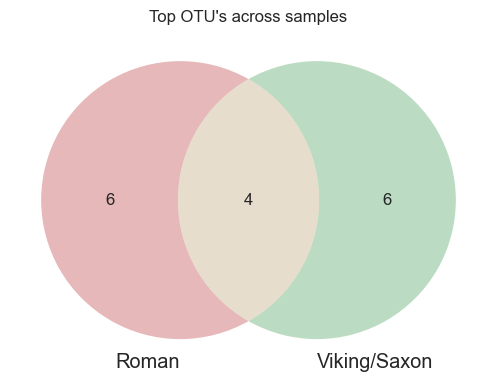

In [119]:
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Plot Venn diagram
plt.figure(figsize=(6, 4))
venn2([top_roman, top_viking], set_labels=("Roman", "Viking/Saxon"))
plt.title("Top OTU's across samples")
plt.tight_layout()
plt.show()



## Step 9 BETA diversity 

In [138]:
!conda config --add channels conda-forge
!conda install scikit-bio -y




Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\aravi\anaconda3

  added / updated specs:
    - scikit-bio


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    array-api-compat-1.12.0    |     pyhe01879c_0          45 KB  conda-forge
    biom-format-2.1.16         |  py312h4389bb4_2         8.7 MB  conda-forge
    ca-certificates-2025.8.3   |       h4c7d964_0         151 KB  conda-forge
    certifi-2025.8.3           |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-24.11.3              |  py312h2e8e312_0         1.1 MB  conda-forge
    libexpat-2.6.3             |       he0c23c2_0         136 KB  conda-forge
    libsqlite-3.50.4           |       hf5d6505_0         1.2 MB  conda-forge
    libzlib-1.2.13             |       h2466b09_6          55 KB  conda-forge
    natsort-8.4.0      

In [144]:
import pandas as pd

# === Load metadata ===
metadata = pd.read_csv("C:/Users/aravi/Videos/project results/alpha and beta diversity/sample_metadata.csv")
metadata = metadata.set_index("sample_id")

# === Load Roman and Viking/Anglo-Saxon distance matrices ===
rome_df = pd.read_csv("C:/Users/aravi/Videos/project results/alpha and beta diversity/rome_beta_diversity_matrix.csv", index_col=0)
viking_df = pd.read_csv("C:/Users/aravi/Videos/project results/alpha and beta diversity/vikinganglo_beta_diversity_matrix.csv", index_col=0)

# === Check shapes ===
print("Metadata shape:", metadata.shape)
print("Rome matrix shape:", rome_df.shape)
print("Viking matrix shape:", viking_df.shape)



Metadata shape: (15, 1)
Rome matrix shape: (9, 9)
Viking matrix shape: (6, 6)


In [154]:
print("DistanceMatrix IDs:", dm.ids)
print("Metadata index:", metadata.index.tolist())





DistanceMatrix IDs: ('ERR1329825', 'ERR1329829', 'ERR1329846', 'ERR1329853', 'ERR1329857', 'ERR1329862', 'ERR1329870', 'ERR1329842', 'ERR1329834', 'ERR1329827', 'ERR1329851', 'ERR1329832', 'ERR1329830', 'ERR1329836', 'ERR1329838')
Metadata index: ['ERR1329825', 'ERR1329829', 'ERR1329846', 'ERR1329853', 'ERR1329857', 'ERR1329862', 'ERR1329870', 'ERR1329842', 'ERR1329834', 'ERR1329827', 'ERR1329851', 'ERR1329832', 'ERR1329830', 'ERR1329836', 'ERR1329838']


In [160]:
print("Unique populations:", metadata["population"].unique())
print("Distance matrix min/max:", combined_df.values.min(), combined_df.values.max())



Unique populations: ['roman' 'viking_anglo']
Distance matrix min/max: 0.0 1.0


In [168]:
print(metadata["population"].value_counts())




population
roman           9
viking_anglo    6
Name: count, dtype: int64


In [170]:
print("Mean distance:", combined_df.values.mean())
print("Standard deviation:", combined_df.values.std())



Mean distance: 0.3491896861786423
Standard deviation: 0.3882230047660564


In [178]:
# Load both abundance tables
rome = pd.read_csv("C:/Users/aravi/Videos/project results/alpha and beta diversity/rome_beta_diversity_matrix.csv", index_col=0)
viking = pd.read_csv("C:/Users/aravi/Videos/project results/alpha and beta diversity/vikinganglo_beta_diversity_matrix.csv", index_col=0)

# Combine them
combined = pd.concat([rome, viking])
combined.to_csv("C:/Users/aravi/Videos/project results/alpha and beta diversity/combined_abundance_table.csv")



In [190]:
rome_ids = set(rome.index)
viking_ids = set(viking.index)
shared = rome_ids & viking_ids
print("Shared sample IDs:", shared)



Shared sample IDs: set()


In [192]:
print("Rome duplicates:", rome.index[rome.index.duplicated()])
print("Viking duplicates:", viking.index[viking.index.duplicated()])



Rome duplicates: Index([], dtype='object')
Viking duplicates: Index([], dtype='object')


In [194]:
print("Rome column duplicates:", rome.columns[rome.columns.duplicated()])
print("Viking column duplicates:", viking.columns[viking.columns.duplicated()])



Rome column duplicates: Index([], dtype='object')
Viking column duplicates: Index([], dtype='object')


In [208]:
# Confirm matrix shape and sample count
print("Combined DistanceMatrix created")
print("Shape:", dm.shape)
print("Sample IDs:", dm.ids[:5], "...")  # Show first 5 IDs



Combined DistanceMatrix created
Shape: (15, 15)
Sample IDs: ('ERR1329825', 'ERR1329829', 'ERR1329846', 'ERR1329853', 'ERR1329857') ...


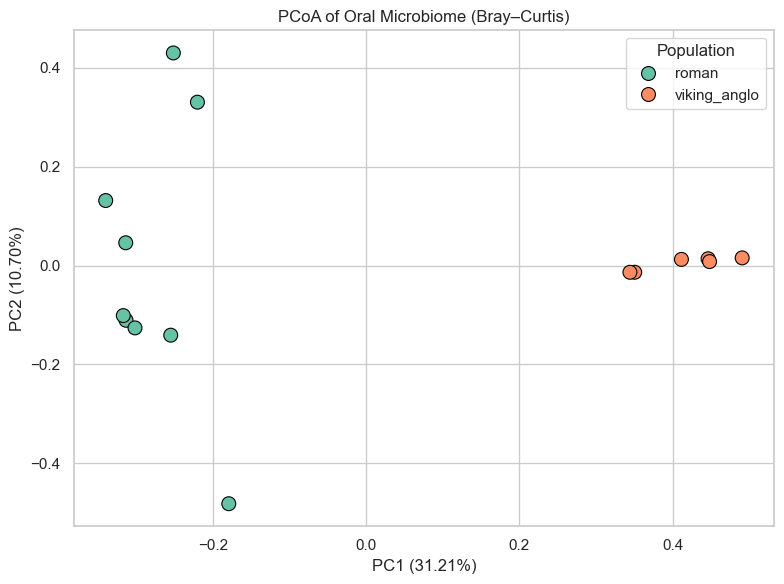

PERMANOVA results:
method name               PERMANOVA
test statistic name        pseudo-F
sample size                      15
number of groups                  2
test statistic             5.746942
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object


In [218]:
import pandas as pd
import numpy as np
from skbio import DistanceMatrix
from skbio.stats.ordination import pcoa
from skbio.stats.distance import permanova
import matplotlib.pyplot as plt
import seaborn as sns

#  Step 1: Load Roman sample matrix
# This file shows how similar each Roman sample is to the others
rome = pd.read_csv("C:/Users/aravi/Videos/project results/alpha and beta diversity/rome_beta_diversity_matrix.csv", index_col=0)
rome.fillna(0, inplace=True)              # Replace missing values with 0
rome = (rome + rome.T) / 2                # Make sure the matrix is symmetrical
np.fill_diagonal(rome.values, 0)          # Set diagonal to 0 (no distance to self)

# Step 2: Load Viking/Anglo matrix
viking = pd.read_csv("C:/Users/aravi/Videos/project results/alpha and beta diversity/vikinganglo_beta_diversity_matrix.csv", index_col=0)
viking.fillna(0, inplace=True)
viking = (viking + viking.T) / 2
np.fill_diagonal(viking.values, 0)

# Step 3: Combine both distance matrices into one big matrix
# Each population gets their original distances, and the rest is filled with max dissimilarity (1)
assert set(rome.index).isdisjoint(viking.index), "Sample names clash between populations!"

combined_ids = rome.index.tolist() + viking.index.tolist()
combined = pd.DataFrame(index=combined_ids, columns=combined_ids, dtype=float)

# Fill in Roman distances
for i in rome.index:
    for j in rome.columns:
        combined.loc[i, j] = rome.loc[i, j]

# Fill in Viking distances
for i in viking.index:
    for j in viking.columns:
        combined.loc[i, j] = viking.loc[i, j]

combined.fillna(1, inplace=True)            # Fill gaps between populations with 1 (max distance)
combined = (combined + combined.T) / 2      # Symmetry check again
np.fill_diagonal(combined.values, 0)

# Step 4: Convert to proper DistanceMatrix format for analysis
dm = DistanceMatrix(np.ascontiguousarray(combined.values), ids=combined.index)

# Step 5: Load metadata and match sample order
metadata = pd.read_csv("C:/Users/aravi/Videos/project results/alpha and beta diversity/sample_metadata.csv", index_col="sample_id")
metadata = metadata.loc[list(dm.ids)]       # Reorder to match distance matrix

# Step 6: Run PCoA to visualize overall differences
pcoa_result = pcoa(dm)
coords = pcoa_result.samples.copy()
coords["population"] = metadata["population"]  # Add labels for plotting

# Step 7: Plot the PCoA — each point is a sample
plt.figure(figsize=(8, 6))
sns.scatterplot(data=coords, x="PC1", y="PC2", hue="population", s=100, palette="Set2", edgecolor="black")
plt.title("PCoA of Oral Microbiome (Bray–Curtis)")
plt.xlabel(f"PC1 ({pcoa_result.proportion_explained.iloc[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pcoa_result.proportion_explained.iloc[1]*100:.2f}%)")
plt.grid(True)
plt.legend(title="Population")
plt.tight_layout()
plt.show()

#  Step 8: Run PERMANOVA to test if populations are truly different
result = permanova(dm, metadata["population"], permutations=999)
print("PERMANOVA results:")
print(result)



In [9]:
import os
import glob
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D



In [13]:
# Path to metadata file
metadata_file = "C:/Users/aravi/Videos/project results/abundance estimation/0.04/sample_metadata.csv"

# Clean BOM from metadata file
with open(metadata_file, "r", encoding="utf-8-sig") as infile:
    lines = infile.readlines()

with open(metadata_file, "w", encoding="utf-8") as outfile:
    outfile.writelines(lines)




In [51]:
def read_abundance_data(input_folder):
    abundance_data = []
    file_names = []

    for input_file in glob.glob(os.path.join(input_folder, '*_abundance.txt')):
        with open(input_file, "r") as f_in:
            abundance_list = [float(line.strip().split(',')[2]) for line in f_in]
            abundance_data.append(abundance_list)
        file_name = os.path.splitext(os.path.basename(input_file))[0].split("_")[0]
        file_names.append(file_name)

    max_length = max(len(abundance_list) for abundance_list in abundance_data)

    for i, abundance_list in enumerate(abundance_data):
        if len(abundance_list) < max_length:
            abundance_data[i] += [0] * (max_length - len(abundance_list))

    return np.array(abundance_data), file_names

def plot_pca(abundance_matrix, file_names, output_folder, metadata_file=None, pca_type='3D', show_variance=False):
    pca = PCA(n_components=3 if pca_type == '3D' else 2)
    principal_components = pca.fit_transform(abundance_matrix)
    explained_variance = pca.explained_variance_ratio_

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d') if pca_type == '3D' else fig.add_subplot(111)

    # Default color
    colors = 'b'

    if metadata_file:
        try:
            metadata = pd.read_csv(metadata_file)
            sample_group_mapping = dict(zip(metadata['sample_name'], metadata['grouping']))

            # Custom color mapping
            group_colors = {
                'roman': 'red',
                'viking_anglo': 'green'
            }

            colors = []
            for name in file_names:
                grouping = sample_group_mapping.get(name, 'unknown')
                color = group_colors.get(grouping, 'gray')
                colors.append(color)

            # Legend
            handles = [plt.Line2D([0], [0], marker='o', color='w',
                                  markerfacecolor=color, markersize=10, label=group)
                       for group, color in group_colors.items()]
            ax.legend(handles=handles, title='Grouping')
        except Exception as e:
            print(f"Error reading metadata: {e}")

    if pca_type == '3D':
        pc1, pc2, pc3 = principal_components[:, 0], principal_components[:, 1], principal_components[:, 2]
        ax.scatter(pc1, pc2, pc3, c=colors, marker='o')
        for i, txt in enumerate(file_names):
            ax.text(pc1[i], pc2[i], pc3[i], txt)
        ax.set_xlabel(f'PC 1 ({explained_variance[0]:.2f})')
        ax.set_ylabel(f'PC 2 ({explained_variance[1]:.2f})')
        ax.set_zlabel(f'PC 3 ({explained_variance[2]:.2f})')
        plt.savefig(os.path.join(output_folder, 'pca_plot_3d.pdf'))
    else:
        pc1, pc2 = principal_components[:, 0], principal_components[:, 1]
        ax.scatter(pc1, pc2, c=colors, marker='o')
        for i, txt in enumerate(file_names):
            ax.text(pc1[i], pc2[i], txt)
        ax.set_xlabel(f'PC 1 ({explained_variance[0]:.2f})')
        ax.set_ylabel(f'PC 2 ({explained_variance[1]:.2f})')
        plt.savefig(os.path.join(output_folder, 'pca_plot_2d.pdf'))

    ax.set_title(f'{pca_type} PCA of Species Abundance')
    ax.grid(True)
    plt.close()








In [55]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D



input_folder = "C:/Users/aravi/Videos/project results/abundance estimation/0.04"
output_folder = input_folder
pca_type = "2D"
show_variance = True

abundance_matrix, file_names = read_abundance_data(input_folder)
plot_pca(abundance_matrix, file_names, output_folder, metadata_file, pca_type, show_variance)




In [45]:
import pandas as pd

df = pd.read_csv(metadata_file)
print(df.columns.tolist())



['sample_name', 'grouping']
